In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR

构建模拟数据

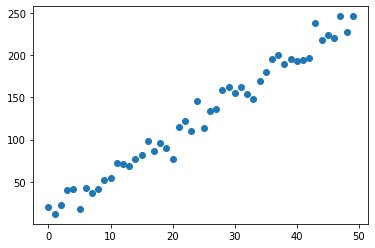

In [26]:
np.random.seed(0)
x=np.arange(50)
y=5*x+3+np.random.randn(50)*10
plt.scatter(x,y)

一、tesorflow法

i=0,loss=tf.Tensor(20529.65081258248, shape=(), dtype=float64)
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:CPU:0
i=1000,loss=tf.Tensor(109.39675229578303, shape=(), dtype=float64)
i=2000,loss=tf.Tensor(109.39675229281416, shape=(), dtype=float64)
i=3000,loss=tf.Tensor(109.3967522928142, shape=(), dtype=float64)
i=4000,loss=tf.Tensor(109.3967522928142, shape=(), dtype=float64)


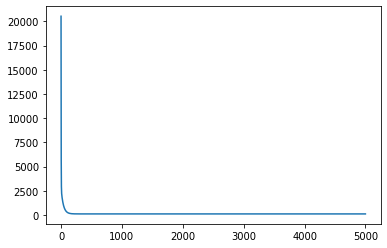

In [27]:
np.random.seed(1)
w = np.random.normal(size = (2,1))
x_ru = (x - x.min())/(x.max()-x.min())
X = np.concatenate((np.ones((50,1)),x_ru.reshape(-1,1)),axis = 1)
Y = y.reshape(-1,1)

W = tf.Variable(w)
mse = []
for i in range(5000):    
    with tf.GradientTape() as tape:
        pred = tf.matmul(X,W)
        loss = tf.reduce_mean(tf.square(Y-pred))
    mse.append(loss)
    W.assign_sub(0.1*tape.gradient(loss,W))
    if not i%1000:
        print('i=%d,loss=%s' %(i,loss))
plt.plot(mse)

array([[ 1.62434536],
       [-0.61175641]])

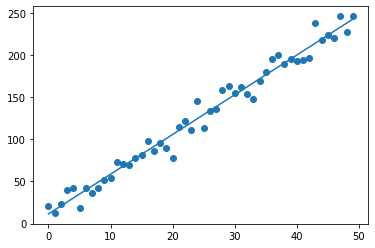

In [28]:
plt.scatter(x,y)
plt.plot(x,pred)
w

二、numpy

i=0,loss=20529.65081258248
i=10,loss=1464.2106289263468
i=20,loss=785.0071796914245
i=30,loss=446.3061008556492
i=40,loss=277.4046819307386
i=50,loss=193.1779371772026
i=60,loss=151.17625017579766
i=70,loss=130.2311012670249
i=80,loss=119.78630025710386
i=90,loss=114.5777496465539
i=100,loss=111.9803809234072
i=110,loss=110.68514069471159
i=120,loss=110.03923807985353
i=130,loss=109.7171432447505
i=140,loss=109.5565229276723
i=150,loss=109.47642575303117
i=160,loss=109.43648337524104
i=170,loss=109.41656515027654
i=180,loss=109.4066324495289
i=190,loss=109.40167927000019


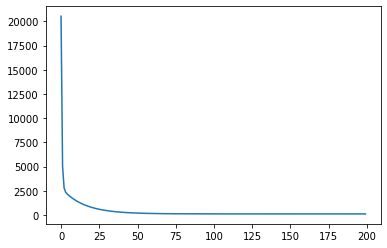

In [29]:
mse = []
for i in range(200):
    pred = np.matmul(X,w)
    loss = np.mean(np.square(Y-pred))
    mse.append(loss)
    grad = np.matmul(X.T,(pred-Y)) 
    w = w - 0.01*grad
    if not i%10:
        print('i=%d,loss=%s' %(i,loss))
plt.plot(mse)

array([[ 11.55334249],
       [230.71675996]])

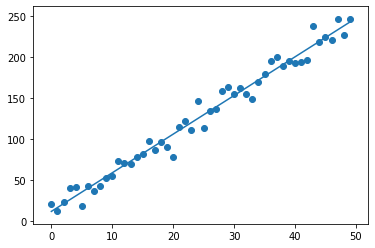

In [30]:
plt.plot(x,pred)
plt.scatter(x,y)
w

三、sklearn

w=4.7119137769407775,b=11.463705188081931


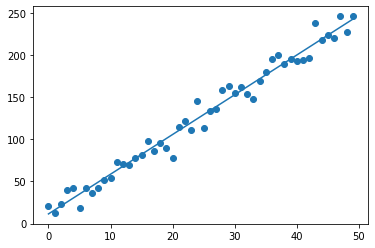

In [31]:
model = LR(fit_intercept=True)
model.fit(x[:,np.newaxis],y)
print('w=%s,b=%s' %(model.coef_[0],model.intercept_))
ypre = model.predict(x[:,np.newaxis])
plt.scatter(x,y)
plt.plot(x,ypre)